In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

from sklearn.metrics.cluster import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

import STAGATE_pyG

datadir= '/data1/shahs3/users/mezallj1/data/dlpfc'

# All Slices

In [2]:
def mclust_P(adata, num_cluster, used_obsm='STAGATE', modelNames='EEE'):
     from sklearn import mixture
     np.random.seed(2020)
     g = mixture.GaussianMixture(n_components=num_cluster, covariance_type='diag')
     res = g.fit_predict(adata.obsm[used_obsm])
     adata.obs['mclust'] = res
     return adata

In [28]:
ari_dic = {}

for filename in os.listdir(f'{datadir}/raw'):
    file_path = os.path.join(f'{datadir}/raw', filename)
    
    if os.path.isfile(file_path):
        
        adata = sc.read_h5ad(file_path)

        #Normalization
        sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)

        #Constructing the spatial network
        STAGATE_pyG.Cal_Spatial_Net(adata, rad_cutoff=150)
        STAGATE_pyG.Stats_Spatial_Net(adata)

        #Running STAGATE
        adata = STAGATE_pyG.train_STAGATE(adata)

        sc.pp.neighbors(adata, use_rep='STAGATE')
        sc.tl.umap(adata)
        #adata = STAGATE_pyG.mclust_R(adata, used_obsm='STAGATE', num_cluster=7)
        adata = mclust_P(adata, used_obsm='STAGATE', num_cluster=7)

        obs_df = adata.obs.dropna()

        adata 

        ari = adjusted_rand_score(obs_df['mclust'], obs_df['Region'])

        ari_dic[filename] = ari

        print('File, %s, ARI, %2.f'%(filename, ari))

151674.h5ad
151509.h5ad
151672.h5ad
151669.h5ad
151508.h5ad
151671.h5ad
151675.h5ad
151670.h5ad
151507.h5ad
151676.h5ad
151673.h5ad
151510.h5ad


# Individual

In [3]:
adata = sc.read_h5ad(f'{datadir}/raw/151673.h5ad')
adata

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

------Calculating spatial graph...
The graph contains 21124 edges, 3639 cells.
5.8049 neighbors per cell on average.


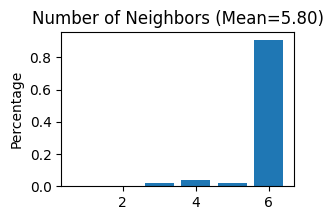

In [5]:
#Constructing the spatial network
STAGATE_pyG.Cal_Spatial_Net(adata, rad_cutoff=150)
STAGATE_pyG.Stats_Spatial_Net(adata)

In [6]:
#Running STAGATE
adata = STAGATE_pyG.train_STAGATE(adata)

Size of Input:  (3639, 3000)


100%|██████████| 1000/1000 [05:01<00:00,  3.32it/s]


In [7]:
def mclust_P(adata, num_cluster, used_obsm='STAGATE', modelNames='EEE'):
     from sklearn import mixture
     np.random.seed(2020)
     g = mixture.GaussianMixture(n_components=num_cluster, covariance_type='diag')
     res = g.fit_predict(adata.obsm[used_obsm])
     adata.obs['mclust'] = res
     return adata

In [8]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
#adata = STAGATE_pyG.mclust_R(adata, used_obsm='STAGATE', num_cluster=7)
adata = mclust_P(adata, used_obsm='STAGATE', num_cluster=7)

In [9]:
obs_df = adata.obs.dropna()

In [10]:
ari = adjusted_rand_score(obs_df['mclust'], obs_df['Region'])
print(ari)

0.28371574137648664
